In [ ]:
import numpy as np
from keras import datasets
from keras.utils import np_utils
from keras import models, layers

# 1. Data Loader

In [ ]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

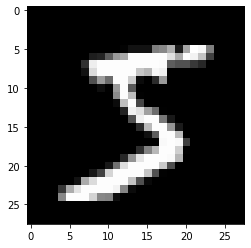

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap='gray')

## 2. X입력 데이터 전처리

In [ ]:
L,W,H = X_train.shape

In [ ]:
# fc에 넣기위해 펼침
X_train = X_train.reshape(-1, W*H)
X_test = X_test.reshape(-1, H*W)
# scaling
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_test[0].max()

1.0

## 3. y값 전처리(one-hot-encoding)

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [ ]:
Y_train.shape

(60000, 10)

## 4. Setting Parameters

In [ ]:
input_size = 28*28
hidden_size = 100
num_classes = 10
num_out = num_classes
num_epochs = 50
batch_size = 100

## 5. Constructor Model

In [ ]:
model = models.Sequential()
model.add(layers.Dense(hidden_size, activation='relu', input_shape = (input_size,))) # 역순
model.add(layers.Dense(num_classes, activation='softmax')) # sequence라서 입력을 넣지 않고 출력만 쓴다.

## 6. Compile

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

## 7. Training

In [ ]:
model.fit(X_train, Y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=2)


Epoch 1/50
480/480 - 1s - loss: 1.2244 - accuracy: 0.6945 - val_loss: 0.6619 - val_accuracy: 0.8553
Epoch 2/50
480/480 - 1s - loss: 0.5791 - accuracy: 0.8582 - val_loss: 0.4600 - val_accuracy: 0.8823
Epoch 3/50
480/480 - 1s - loss: 0.4549 - accuracy: 0.8805 - val_loss: 0.3916 - val_accuracy: 0.8953
Epoch 4/50
480/480 - 1s - loss: 0.4002 - accuracy: 0.8920 - val_loss: 0.3546 - val_accuracy: 0.9027
Epoch 5/50
480/480 - 1s - loss: 0.3681 - accuracy: 0.8985 - val_loss: 0.3318 - val_accuracy: 0.9081
Epoch 6/50
480/480 - 1s - loss: 0.3458 - accuracy: 0.9035 - val_loss: 0.3163 - val_accuracy: 0.9121
Epoch 7/50
480/480 - 1s - loss: 0.3292 - accuracy: 0.9083 - val_loss: 0.3033 - val_accuracy: 0.9149
Epoch 8/50
480/480 - 1s - loss: 0.3156 - accuracy: 0.9118 - val_loss: 0.2923 - val_accuracy: 0.9183
Epoch 9/50
480/480 - 1s - loss: 0.3041 - accuracy: 0.9143 - val_loss: 0.2832 - val_accuracy: 0.9207
Epoch 10/50
480/480 - 1s - loss: 0.2942 - accuracy: 0.9166 - val_loss: 0.2755 - val_accuracy: 0.9217

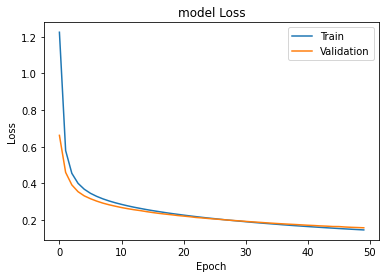

In [ ]:
plot_loss(model.history)

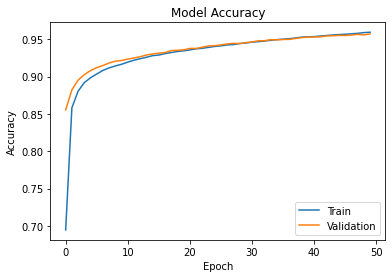

In [ ]:
plot_acc(model.history)

## 8. Evaluate

In [ ]:
model_performance = model.evaluate(X_test, Y_test)
print('Loss: {}, Accuracy :{}'.format(*model_performance))

313/313 [==============================] - 1s 2ms/step - loss: 0.1548 - accuracy: 0.9575
Loss: 0.15475967526435852, Accuracy :0.9574999809265137


## 9. Loss and Accuracy visualization

In [ ]:
import matplotlib.pyplot as plt
# plt.plot(range(10),range(100,110)) # 기냥 그래프 나오는지만 확인

# history - 트레이닝할때 나오는 모든 로그 메시지들을 다 모아서 리턴하는 객체정보

# loss 관련된 plot 함수
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch') # X 측이 늘어남에 따라서 Y축이 얼마나 떨어지는가가 궁금한것이다.
    plt.legend(['Train','Validation'])
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','Validation'])